# Demo de Algoritmos de Inducción para generar reglas para clasificar datos


In [ ]:
#@title Librerías a usar
import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output

import os
import csv

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Librerías cargadas")

Librerías cargadas


# Datos:

In [ ]:
#@title Acceder al Drive

# monta Google Drive:
# Nota: la primera vez se debe confirmar el uso logueandose en "Google Drive File Stream" y obteniendo código de autentificación.
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = '/content/gdrive/My Drive/IA/demoIA/datos/'  #@param {type:"string"}


Mounted at /content/gdrive


In [ ]:

#@title Cargar datos


#@markdown ### Archivo de datos a utilizar:
archivo_datos = 'IRIS.csv'  #@param {type:"string"}
#@markdown ### Configuración del archivo CSV:
delimitador_columnas = ',' #@param {type:"string"}

## selección de los parámetros

# función para cargar configuración datos automática
def cargarNombreClases(path, archivo_datos):
  # importa definición de la clase
  arClasesFN = archivo_datos.split('.')[0] + '_nombreClases.txt'
  if os.path.isfile( path + '/' + arClasesFN ):
    with open( path + '/' + arClasesFN, mode='r') as csvfile:
        r = csv.reader(csvfile, delimiter=',')
        auxAtributo = r.__next__()
        auxClases = r.__next__()
    print('\n> Definición de los valores discretos para la clase cargada de ' + arClasesFN +'.\n')
    return auxAtributo[0], ','.join(auxClases)
  else:
    return "", ""

# función auxiliara para que no ejecute UI cada vez
def hacerNada():
  return

# se define esta función para que se ocupe de aplicar la configuración
def on_buttonAplicar_clicked(b):
  print("")
  funcionCambiaSeleccion_ConfigDatos(combo_att_clase.value, texto_nomClases.value, combo_att_entrada.value)

# aplica configuración de datos
def funcionCambiaSeleccion_ConfigDatos(attClase, nomClases, att_entrada):
  global Y, X, nombre_clases, atributos_entrada, ClassAttributeName

  if (attClase is None) or (attClase =="") or\
    (att_entrada is None) or (att_entrada ==""):
    return

  # si el atributo clase está como de entrada, lo saca (no tiene sentido)
  att_entrada = list(att_entrada)
  if attClase in att_entrada:
    print("Eliminando atributo " + attClase + " como de entrada dado que es clase.")
    att_entrada.remove( attClase )

  if (att_entrada == "") or (len(att_entrada)==0):
    print("No se han definido atributos de entrada!")
    return

  # guarda configuración
  nombre_clases = nomClases

    # genera los datos solo con los atributos seleccionados
  Y = np.array(df[attClase])
  X = np.array(df[att_entrada])

  # muestra resultados
  print("\n> Atributos entrada: ", att_entrada)
  print("\t X: ", X.shape)

  if (nombre_clases is None) or (nombre_clases==""):
    print("\n> Atributo clase: ", attClase)
  else:
    print("\n> Atributo clase: ", attClase, " [", nombre_clases, "]")
  print("\t Y: ", Y.shape)

  # guarda para usar luego
  atributos_entrada = att_entrada
  ClassAttributeName = attClase

## aplicación de los parámetros elegidos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

# Carga los datos del CSV y muestra los primeros
df = pd.read_csv(path + archivo_datos,  sep=delimitador_columnas, engine="python")
print("Archivo de datos ", archivo_datos, " cargado")

print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())
print("\n")

# inicializa valores
X = None
Y = None
atributos_entrada = []
ClassAttributeName = ""

# intenta cargar configuración asociada a los datos
# trata de obtener la configuración del archivo asociado
atributo_clase, nombre_clases = cargarNombreClases(path, archivo_datos)

# muestra interface para cargar configuración

# auxiliar para que muestre bien la descripción
style_3D = {'description_width': 'initial'}

tit = widgets.Label("Ajuste para configuración de los Datos: ")

# prepara combo para determinar atributo clase
selecc_atributos = [ ]
selecc_atributos.extend( df.columns.values.tolist() )
if (atributo_clase is None) or (atributo_clase=="") or (atributo_clase not in selecc_atributos):
  att_selecc_defecto = len(selecc_atributos)-1
else:
  att_selecc_defecto = selecc_atributos.index(atributo_clase)
combo_att_clase = widgets.Dropdown(
    options = selecc_atributos,
    value = selecc_atributos[att_selecc_defecto], # mostrar por defecto de config
    description = 'Atributo clase:',
    style=style_3D,
    disabled = False,
)
# prepara campo para ingresar nombre clases (toma por defecto de config)
texto_nomClases = widgets.Text(
    value=nombre_clases,
    placeholder='Ingrese nombre clases (si corresponde) separados por comas',
    description='Nombre clases:',
    style=style_3D,
    disabled=False
)

combo_att_entrada = widgets.SelectMultiple(
    options=selecc_atributos,
    value=selecc_atributos,
    #rows=10,
    description='Atributos de entrada:',
    style=style_3D,
    disabled=False
)

# prepara botón y grilla con objetos
btnAplicar = widgets.Button(
    description='Aplicar'
)
configDatos_ui = widgets.GridBox(
      children=[tit, combo_att_clase, texto_nomClases, combo_att_entrada, btnAplicar],
      layout=Layout(width='100%')  )
btnAplicar.on_click(on_buttonAplicar_clicked)

#clear_output()
out_config = widgets.interactive_output(hacerNada, {})
display(configDatos_ui)

# ejecuta para que muestre
on_buttonAplicar_clicked(btnAplicar)


Archivo de datos  IRIS.csv  cargado

> Cabecera: 
   LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo  Clase
0          5.1          3.5          1.4          0.2      1
1          4.9          3.0          1.4          0.2      1
2          4.7          3.2          1.3          0.2      1
3          4.6          3.1          1.5          0.2      1
4          5.0          3.6          1.4          0.2      1

> Características: 
       LargoSepalo  AnchoSepalo  LargoPetalo  AnchoPetalo       Clase
count   150.000000   150.000000   150.000000   150.000000  150.000000
mean      5.843333     3.054000     3.758667     1.198667    2.000000
std       0.828066     0.433594     1.764420     0.763161    0.819232
min       4.300000     2.000000     1.000000     0.100000    1.000000
25%       5.100000     2.800000     1.600000     0.300000    1.000000
50%       5.800000     3.000000     4.350000     1.300000    2.000000
75%       6.400000     3.300000     5.100000     1.800000    3.000000
max

GridBox(children=(Label(value='Ajuste para configuración de los Datos: '), Dropdown(description='Atributo clas…


Eliminando atributo Clase como de entrada dado que es clase.

> Atributos entrada:  ['LargoSepalo', 'AnchoSepalo', 'LargoPetalo', 'AnchoPetalo']
	 X:  (150, 4)

> Atributo clase:  Clase  [ na,Setosa,Versicolor,Virginica ]
	 Y:  (150,)


In [ ]:
#@title Preparar datos

#@markdown Para algoritmos de inducción siempre el atributo clase debe ser considerado como Discreto
considerar_atributo_clase = "discreto - CLASIFICACION" #@param ["discreto - CLASIFICACION"]  ## , "continuo - ESTIMACION"

#@markdown Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   75#@param {type:"integer"}

print("> se considera problema de CLASIFICACIÓN \n")

CLASES = []
# define nombre de clases
if (nombre_clases == "") or (nombre_clases == "-"):
    # toma los valores de clase orginales del archivo
    if str(Y[0]).replace(".","").isnumeric():
        # Y son numeros
        for val in range(int(np.max(Y))+1):
          CLASES.append( "clase {:>3}".format(val) )
        # para algoritmos de inducción la salida debe ser discreta
        # asi que se define lista auxiliar ya con nombre de clases
        Ydisc = [ CLASES[y] for y in Y ]
    else:
        # Y no son números
        CLASES = list(set(Y))
        CLASES.sort()
        # ya son discretos
        Ydisc = Y
else:
    # toma configuración de nombre de clases
    for val in nombre_clases.split(','):
      CLASES.append( val )
    # para algoritmos de inducción la salida debe ser discreta
    # asi que se define lista auxiliar ya con nombre de clases
    Ydisc = [ CLASES[y] for y in Y ]

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

# separa al azar usando muestreo con proporción indicada
# intenta hacer muestreo estatificado
try:
  x_train, x_test, y_train, y_test = train_test_split(X, Ydisc, test_size=(1-propTrain), stratify=Y, shuffle=True)
except ValueError:
  print("-- No se puede aplicar Muestreo Estratificado! -> se usa Muestreo Simple \n")
  # hace muestreo simple
  x_train, x_test, y_train, y_test = train_test_split(X, Ydisc, test_size=(1-propTrain), shuffle=True)

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for cl in CLASES:
  cant = 0
  for y in y_train:
    if cl == y: cant = cant + 1
  if cant==0:
    CLASES.remove(cl)
  else:
    print("    ", cl, ":", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for cl in CLASES:
  cant = 0
  for y in y_test:
    if cl == y: cant = cant + 1
  print("    ", cl, ":", cant)




> se considera problema de CLASIFICACIÓN 


> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (112, 4)
 - y_train (cant):  112
     Versicolor : 37
     Virginica : 38

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (38, 4)
 - y_test (cant):  38
     Setosa : 13
     Versicolor : 13
     Virginica : 12


# Modelo:

In [ ]:
#@title Aplicar Algoritmo de Inducción

# parámetros

param_criterio = "Entropy" #@param ["Entropy", "Error", "Gini impurity"]
if param_criterio == "Entropy":
  pCriteria = "entropy"
elif param_criterio == "Error":
  pCriteria = "log_loss"
#elif param_criterio == "Gini impurity":
else:
  pCriteria = "gini"
param_max_depth = 0 #@param {type:"number"}
if param_max_depth < 1:
    # menor que 1 es opcional
    param_max_depth = None
param_split_strategy = "Best" #@param ["Best", "Random"]
if param_split_strategy== "Best":
  pSpliter = "best"
#elif param_split_strategy == "Random":
else:
  pSpliter = "random"
param_min_samples_split  = 0 #@param {type:"number"}
if param_min_samples_split  < 2:
    param_min_samples_split  = 2
param_min_samples_leaf  = 1 #@param {type:"number"}
if param_min_samples_leaf  < 1:
    param_min_samples_leaf  = 1
param_max_leaf_nodes = 0 #@param {type:"number"}
if param_max_leaf_nodes < 2:
    param_max_leaf_nodes = None

# genera el árbol y lo muestra
clf = tree.DecisionTreeClassifier(criterion=pCriteria,
                                  splitter=pSpliter,
                                  max_depth=param_max_depth,
                                  min_samples_split=param_min_samples_split,
                                  min_samples_leaf=param_min_samples_leaf,
                                  max_leaf_nodes=param_max_leaf_nodes)
clf = clf.fit(x_train, y_train)

# muestra las reglas
r = tree.export_text(clf,
                     feature_names= list(atributos_entrada),
                     spacing=5, decimals=2)

print("> Reglas:" )
print(r)




> Reglas:
|----- LargoPetalo <= 2.50
|     |----- class: Setosa
|----- LargoPetalo >  2.50
|     |----- AnchoPetalo <= 1.65
|     |     |----- LargoPetalo <= 5.00
|     |     |     |----- class: Versicolor
|     |     |----- LargoPetalo >  5.00
|     |     |     |----- LargoSepalo <= 6.05
|     |     |     |     |----- class: Versicolor
|     |     |     |----- LargoSepalo >  6.05
|     |     |     |     |----- class: Virginica
|     |----- AnchoPetalo >  1.65
|     |     |----- LargoPetalo <= 4.85
|     |     |     |----- AnchoSepalo <= 3.10
|     |     |     |     |----- class: Virginica
|     |     |     |----- AnchoSepalo >  3.10
|     |     |     |     |----- class: Versicolor
|     |     |----- LargoPetalo >  4.85
|     |     |     |----- class: Virginica



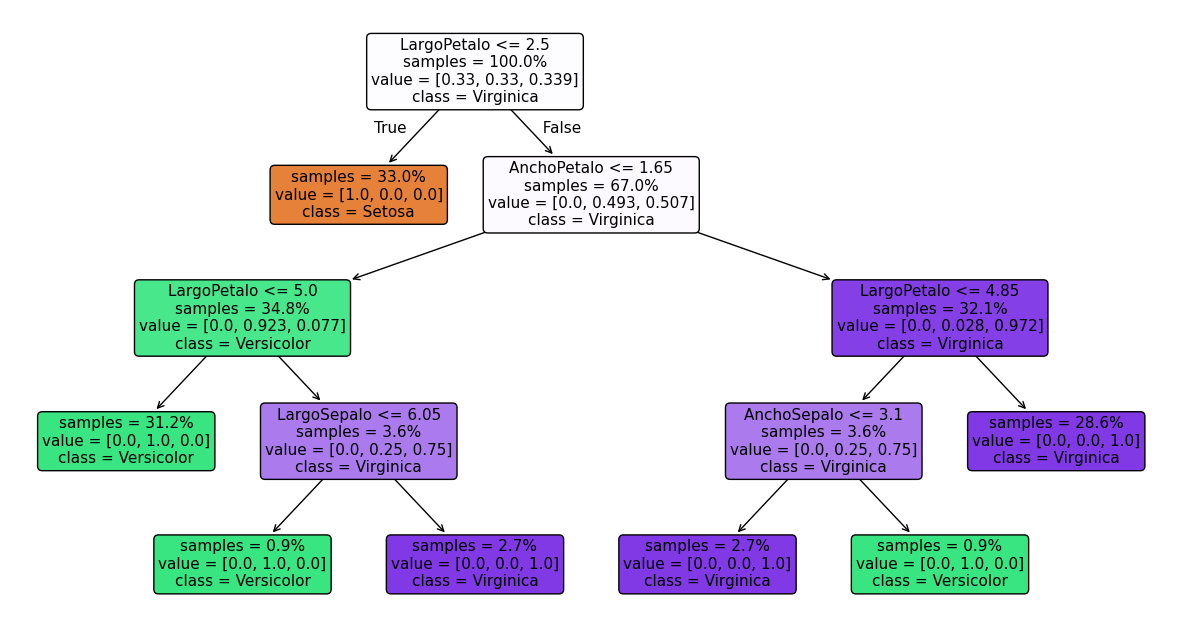

In [ ]:
#@title Mostrar Árbol de Decisión


# muestra el árbol
plt.figure(figsize=(15,8))
tree.plot_tree(clf,
              feature_names=atributos_entrada,
              class_names=CLASES,
              label='all',
              impurity=False,
              proportion=True,
              rounded=True,
              filled=True,
              fontsize=11)
plt.show()


*** Resultados con datos de Entrenamiento: 
  Datos Entrada -> Clase Real / Clase Modelo [resultado]
  [6.7 3.3 5.7 2.1]-> R: Virginica / M: Virginica [ OK ]
  [6.3 3.3 6.  2.5]-> R: Virginica / M: Virginica [ OK ]
  [5.4 3.9 1.7 0.4]-> R: Setosa / M: Setosa [ OK ]
  [7.9 3.8 6.4 2. ]-> R: Virginica / M: Virginica [ OK ]
  [4.6 3.4 1.4 0.3]-> R: Setosa / M: Setosa [ OK ]
  [6.4 2.8 5.6 2.1]-> R: Virginica / M: Virginica [ OK ]
  [5.4 3.9 1.3 0.4]-> R: Setosa / M: Setosa [ OK ]
  [6.2 2.8 4.8 1.8]-> R: Virginica / M: Virginica [ OK ]
  [5.  3.4 1.5 0.2]-> R: Setosa / M: Setosa [ OK ]
  [6.  3.4 4.5 1.6]-> R: Versicolor / M: Versicolor [ OK ]
  [5.6 2.5 3.9 1.1]-> R: Versicolor / M: Versicolor [ OK ]
  [5.7 3.8 1.7 0.3]-> R: Setosa / M: Setosa [ OK ]
  [5.5 4.2 1.4 0.2]-> R: Setosa / M: Setosa [ OK ]
  [4.9 2.4 3.3 1. ]-> R: Versicolor / M: Versicolor [ OK ]
  [6.  3.  4.8 1.8]-> R: Virginica / M: Virginica [ OK ]
  [5.5 2.5 4.  1.3]-> R: Versicolor / M: Versicolor [ OK ]
  [5.  3.  1.6 

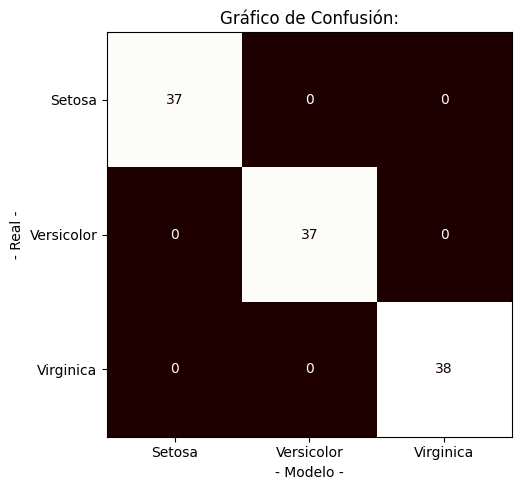

In [ ]:
#@title Evaluar modelo con datos de entrenamiento
mostrar_detalle_entrenamiento = True #@param {type:"boolean"}

# función auxiliar para probar el modelo entrenado en detalle
def probarModelo(x, y, clases_map, mostrarDetalle=False):

    # procesa las imágenes de prueba con el modelo
    predClass = clf.predict(x)

    if mostrarDetalle:
      print("  Datos Entrada -> Clase Real / Clase Modelo [resultado]")

    # muestra los resultados con las imágenes
    classPreds = []
    classReal = []

    for i in range(len(x)):

        # prepara salida
        clReal = y[i]
        clPred = predClass[i]

        classReal.append( clReal )
        classPreds.append( clPred )

        strTitulo = "  "
        strTitulo = strTitulo +str(x[i]) + '-> R: ' + str(clReal)
        strTitulo = strTitulo + ' / M: ' + str(clPred)
        strTitulo = strTitulo + " [ " + ("OK" if (clPred==clReal) else "ERROR!") + " ]"

        # muestra comparación con la imagen
        if mostrarDetalle:
          print(strTitulo)

    # muestra reporte de clasificación
    print("\n Reporte de Clasificación: ")
    print(classification_report(classReal, classPreds))

    # muestra matriz de confusion
    print('\nMatriz de Confusión ( real / modelo ): ')
    cm = confusion_matrix(classReal, classPreds, labels=clases_map)
    cmtx = pd.DataFrame(
        cm,
        index=['r:{:}'.format(x) for x in clases_map],
        columns=['m:{:}'.format(x) for x in clases_map]
      )
    # agrega para poder mostrar la matrix de confusión completa
    pd.options.display.max_rows = 100
    pd.options.display.max_columns = 100
    cmtx.sort_index(axis=0, inplace=True)
    cmtx.sort_index(axis=1, inplace=True)
    print(cmtx)
    print("\n")

    # gráfico de comparación
    dispCM = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clases_map)
    fig, ax = plt.subplots(figsize=(15,5))
    dispCM.plot(ax=ax, cmap=plt.cm.pink, values_format='g', colorbar=False)
    dispCM.ax_.set_title('Gráfico de Confusión:')
    dispCM.ax_.set(xlabel='- Modelo -', ylabel='- Real -')
    plt.tight_layout()
    plt.show()

# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo(x_train, y_train, CLASES, mostrar_detalle_entrenamiento)




*** Resultados con datos de Prueba: 
  Datos Entrada -> Clase Real / Clase Modelo [resultado]
  [5.  2.3 3.3 1. ]-> R: Versicolor / M: Versicolor [ OK ]
  [5.  3.4 1.6 0.4]-> R: Setosa / M: Setosa [ OK ]
  [6.  2.2 5.  1.5]-> R: Virginica / M: Versicolor [ ERROR! ]
  [7.2 3.6 6.1 2.5]-> R: Virginica / M: Virginica [ OK ]
  [6.4 3.2 5.3 2.3]-> R: Virginica / M: Virginica [ OK ]
  [6.9 3.1 4.9 1.5]-> R: Versicolor / M: Versicolor [ OK ]
  [5.3 3.7 1.5 0.2]-> R: Setosa / M: Setosa [ OK ]
  [6.3 2.5 5.  1.9]-> R: Virginica / M: Virginica [ OK ]
  [6.1 3.  4.9 1.8]-> R: Virginica / M: Virginica [ OK ]
  [6.8 2.8 4.8 1.4]-> R: Versicolor / M: Versicolor [ OK ]
  [5.2 4.1 1.5 0.1]-> R: Setosa / M: Setosa [ OK ]
  [6.7 3.1 5.6 2.4]-> R: Virginica / M: Virginica [ OK ]
  [6.1 2.9 4.7 1.4]-> R: Versicolor / M: Versicolor [ OK ]
  [6.6 3.  4.4 1.4]-> R: Versicolor / M: Versicolor [ OK ]
  [5.2 2.7 3.9 1.4]-> R: Versicolor / M: Versicolor [ OK ]
  [4.9 3.1 1.5 0.1]-> R: Setosa / M: Setosa [ OK ]

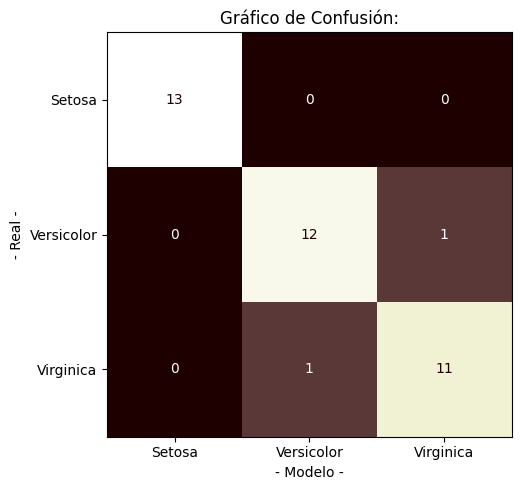

In [ ]:
 #@title Evaluar modelo con datos de prueba
 # evalua al modelo entrenado
mostrar_detalle_prueba = True #@param {type:"boolean"}

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo(x_test, y_test, CLASES, mostrar_detalle_prueba)